https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ


http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

In [ ]:
import torchvision

In [ ]:
!mkdir celeba

In [ ]:
! cp '/content/drive/MyDrive/data/img_align_celeba.zip' ./celeba

In [ ]:
!unzip -j '/content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip' -d celeba

Archive:  /content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip
  inflating: celeba/list_bbox_celeba.txt  
  inflating: celeba/identity_CelebA.txt  
  inflating: celeba/list_landmarks_celeba.txt  
  inflating: celeba/list_landmarks_align_celeba.txt  
  inflating: celeba/list_attr_celeba.txt  


In [ ]:
!cp /content/drive/MyDrive/data/list_eval_partition.txt celeba

In [ ]:
from glob import glob

In [ ]:
glob('/content/celeba/*')

['/content/celeba/list_attr_celeba.txt',
 '/content/celeba/identity_CelebA.txt',
 '/content/celeba/list_bbox_celeba.txt',
 '/content/celeba/list_landmarks_align_celeba.txt',
 '/content/celeba/list_landmarks_celeba.txt',
 '/content/celeba/img_align_celeba.zip',
 '/content/celeba/list_eval_partition.txt']

In [ ]:
!unzip '/content/celeba/img_align_celeba.zip' -d celeba

In [ ]:
glob("celeba/img_align_celeba/*.jpg")

In [ ]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path,split='train',target_type='attr',download=True)

Files already downloaded and verified


In [ ]:
import torch

In [ ]:
isinstance(celeba_dataset, torch.utils.data.Dataset)

True

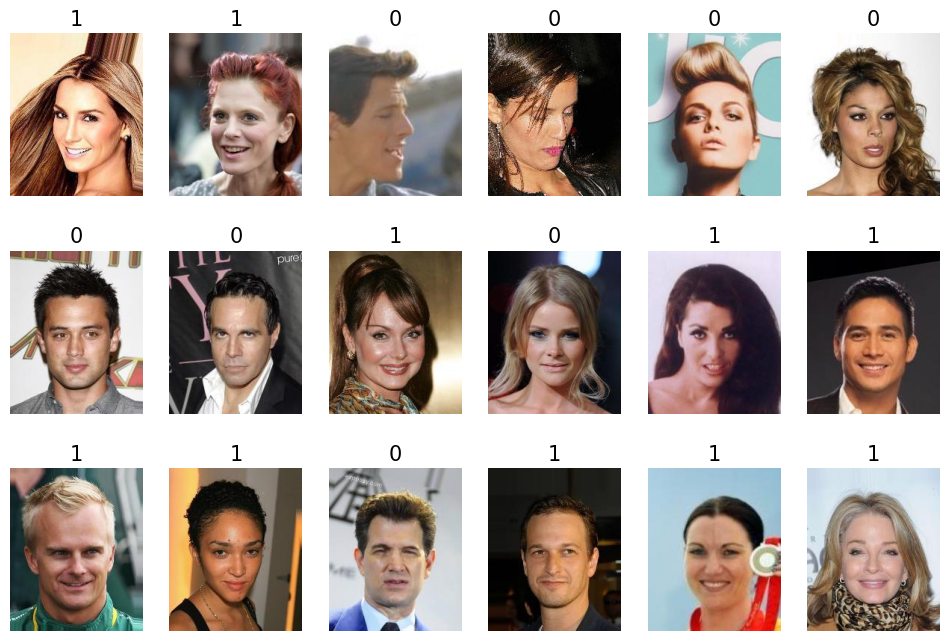

In [ ]:
import matplotlib.pyplot as plt
from itertools import islice
fig = plt.figure(figsize=(12,8))
for i, (image,attributes) in islice(enumerate(celeba_dataset),18):  # 처음부터 18개를 가져와라
  ax = fig.add_subplot(3,6,i+1)
  ax.set_axis_off()
  ax.imshow(image)
  ax.set_title(f"{attributes[31]}", size=15)  # 성별 속성 0은 남성 1은 여성
plt.show()

In [ ]:
mnist_dataset =  torchvision.datasets.MNIST(image_path,'train',download=True)
assert isinstance(mnist_dataset,torch.utils.data.Dataset)

100%|██████████| 9912422/9912422 [00:00<00:00, 114001006.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 71890619.48it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33786157.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13636742.14it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



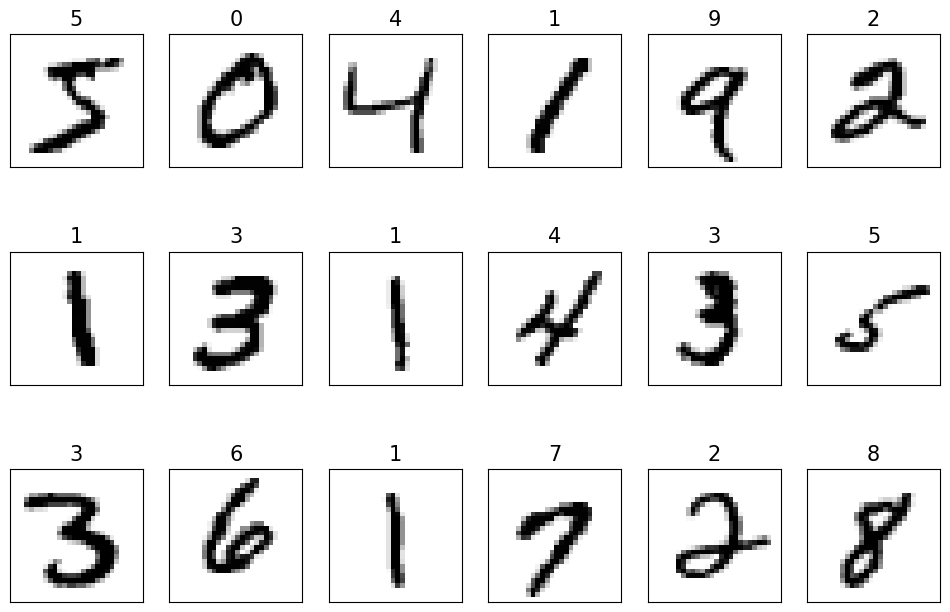

In [ ]:
fig = plt.figure(figsize=(12,8))
for i, (image,label) in islice(enumerate(mnist_dataset),18):  # 처음부터 18개를 가져와라
  ax = fig.add_subplot(3,6,i+1)
  # ax.set_axis_off()
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image,cmap='gray_r')
  ax.set_title(f"{label}", size=15)  # 성별 속성 0은 남성 1은 여성
plt.show()

파이토치로 신경망모델 만들기

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


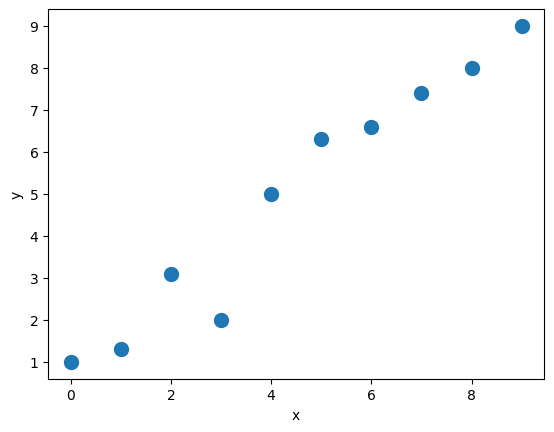

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],
                     dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [7]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()  #그레이디언트(기울기)를 자동으로 계산하는데 사용
bias = torch.zeros(1,requires_grad=True)

def loss_fn(input,target):  # mse
  return (input-target).pow(2).mean()

def model(xb):
  return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch) # 예측(학습) 전방계산 forward
    loss = loss_fn(pred,y_batch)  # 오차  loss
    loss.backward()  # 역전파  backward
    # 학습이 아니라 추론 단계에서는 모델의 파라메터를 업데이트 할 필요가 없다
    with torch.no_grad():  # 그레이디언트를 적용 안하고 연산을 수행  학습아닌 경우 (검증이나 테스트) 가중치나 편향을 업데이트
      weight -= weight.grad * learning_rate
      bias -= bias.grad * learning_rate
      weight.grad.zero_()
      bias.grad.zero_()
  if epoch % log_epochs == 0:
    print(f"epoch{epoch} loss:{loss.item():.4f}")


epoch0 loss:45.0782
epoch10 loss:26.4366
epoch20 loss:1.5918
epoch30 loss:14.1307
epoch40 loss:11.6038
epoch50 loss:6.3084
epoch60 loss:0.6349
epoch70 loss:3.1374
epoch80 loss:1.9999
epoch90 loss:0.3133
epoch100 loss:0.7653
epoch110 loss:1.0039
epoch120 loss:0.0235
epoch130 loss:0.5176
epoch140 loss:0.0759
epoch150 loss:1.8789
epoch160 loss:0.0008
epoch170 loss:0.0866
epoch180 loss:0.0646
epoch190 loss:0.0011


최종 파라메터: (2.6696107387542725, 4.879678249359131)


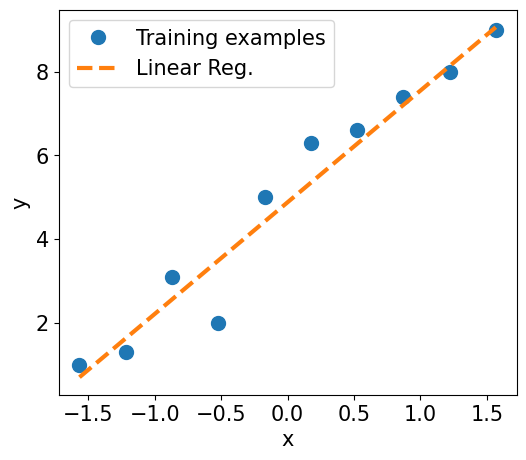

In [10]:
print(f"최종 파라메터: {weight.item(), bias.item()}")

X_test = np.linspace(0,9,num=100, dtype='float32').reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach() # 계산 그래프에서 텐서를 분리합니다

fig = plt.figure(figsize = (13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major',labelsize=15)
plt.show()

torch.nn 과 torch.optim 모듈로 모델 훈련하기

In [12]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size) # 텐서플로우의 Dense 와 동일
loss_fn = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    # 예측
    pred = model(x_batch)[:,0]  # batch_size, output_size
    # 손실 계산
    loss = loss_fn(pred,y_batch)
    # 그레이디언트를 계산
    loss.backward()
    # 그레이디언트를 사용해서 파라메터를 업데이트
    optimizer.step()
    # 그레이디언트를 0으로 초기화
    optimizer.zero_grad()
  if epoch % log_epochs == 0:
    print(f"epoch:{epoch} loss:{loss.item():.4f}")

epoch:0 loss:24.6684
epoch:10 loss:29.1377
epoch:20 loss:20.9207
epoch:30 loss:0.1257
epoch:40 loss:12.4922
epoch:50 loss:1.7845
epoch:60 loss:7.6425
epoch:70 loss:2.5606
epoch:80 loss:0.0157
epoch:90 loss:0.7548
epoch:100 loss:0.8412
epoch:110 loss:0.4923
epoch:120 loss:0.0823
epoch:130 loss:0.0794
epoch:140 loss:0.0891
epoch:150 loss:0.0973
epoch:160 loss:0.1043
epoch:170 loss:0.1103
epoch:180 loss:0.0009
epoch:190 loss:0.0764


최종 파라메터: (2.6696107387542725, 4.879678249359131)


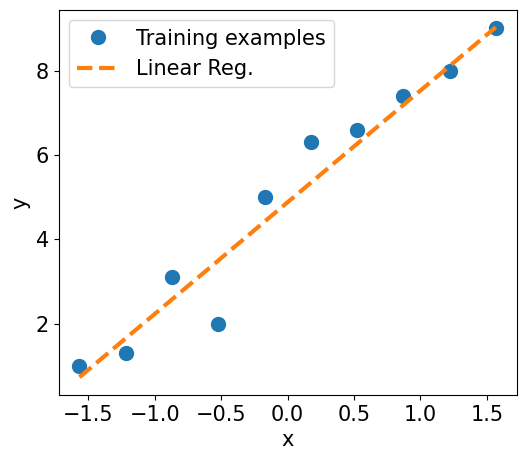

In [13]:
print(f"최종 파라메터: {weight.item(), bias.item()}")

X_test = np.linspace(0,9,num=100, dtype='float32').reshape(-1,1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach() # 계산 그래프에서 텐서를 분리합니다

fig = plt.figure(figsize = (13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major',labelsize=15)
plt.show()

다층 퍼셉트론 - 붓꽃 데이터셋

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=1./3, random_state=1
)

In [16]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [34]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size,hidden_size)
    self.layer2 = nn.Linear(hidden_size,output_size)
  def forward(self, x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


In [30]:
pred = model(next(iter(train_dl))[0])
print(pred)

tensor([[0.3309, 0.2837, 0.3854],
        [0.3377, 0.2787, 0.3836]], grad_fn=<SoftmaxBackward0>)


In [35]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0]* num_epochs
for epoch in range(num_epochs):
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)
    loss = loss_fn(pred, y_batch.long())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    loss_hist[epoch] += loss.item() * y_batch.size(0)
    is_correct = (torch.argmax(pred,dim=1) == y_batch).float()
    accuracy_hist[epoch] += is_correct.sum()

  if epoch % log_epochs == 0:
    print(f"epoch:{epoch} loss:{loss.item():.4f}")


  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)

epoch:0 loss:1.1152
epoch:10 loss:1.2782
epoch:20 loss:0.9417
epoch:30 loss:0.6334
epoch:40 loss:0.8295
epoch:50 loss:0.7234
epoch:60 loss:0.7017
epoch:70 loss:0.6149
epoch:80 loss:0.6703
epoch:90 loss:0.5610


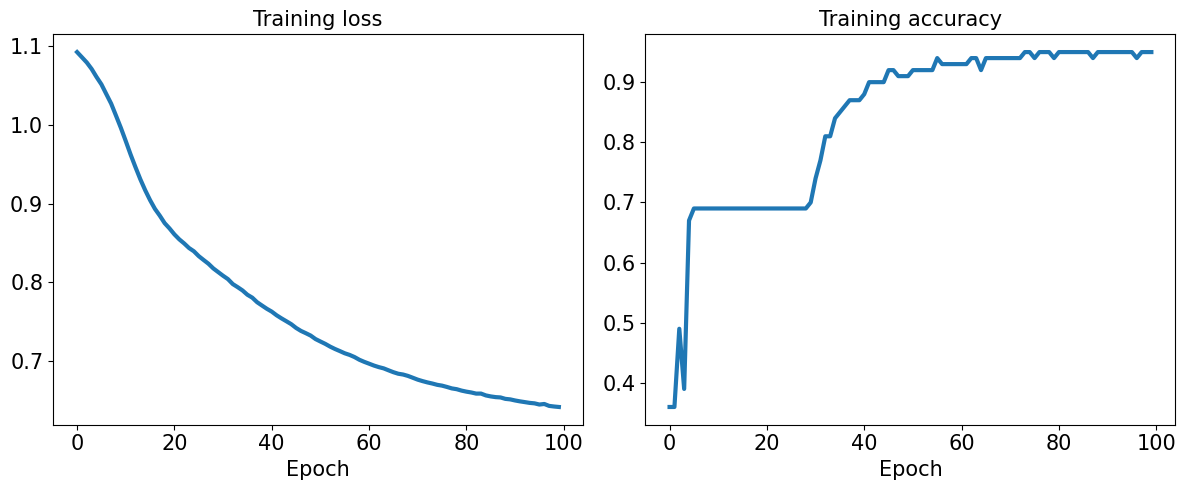

In [36]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,2,1)
ax.plot(loss_hist, lw=3)
ax.set_title("Training loss", size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1,2,2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()

테스트 데이터셋에서 모델 평가하기

In [40]:
np.array(y_test)


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

In [42]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'test accuracy:{accuracy:.4f}')

test accuracy:0.9800


훈련된 모델을 저장하고 로드하기

In [43]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [44]:
model_new = torch.load(path)
model_new.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [45]:
pred_test =  model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'test accuracy:{accuracy:.4f}')

test accuracy:0.9800


모델 전체가 아니라 가중치만 저장하고 불러오기
  - 모델 레이아웃을 만들고 가중치를 불러와야한다.

In [46]:
path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [47]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))

pred_test =  model_new(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
print(f'test accuracy:{accuracy:.4f}')

test accuracy:0.9800


다층 신경망의 활성화 함수 선택
  - 로지스틱 함수 요약
    - 이진 분류문제에 적용
    - 확률 출력

In [48]:
import numpy as np
X = np.array([1,1.4,2.5])
w = np.array([0.4,0.3,0.5])

def net_input(X,w):
  # return np.dot(X,w)
  return X @ w

def logistic(z):  # 0~1사이의 값을 반환하는 함수
  return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
  z = net_input(X,w)
  return logistic(z)

print(f"P(y=1|x) = {logistic_activation(X,w):.3f}")

P(y=1|x) = 0.888


다층퍼셉트론에서 순전파( forward)  과정

In [55]:
# (n_output_units, h_hidden_unit+1)  3,4
W = np.array([
 [1.1, 1.2, 0.8, 0.4],  # bias 가중치
 [0.2, 0.4, 1.0, 0.2],  # output unit 에 대한 가중치
 [0.6, 1.5, 1.2, 0.7]  # output unit 에 대한 가중치
])
# 데이터 배열  (n_hidden_unit+1, n_samples)
A = np.array([
    [1, 0.1, 0.4, 0.6]  # 첫번째 열은 항상 1로 설정되어 bias를 표현
])
W.shape, A.shape
Z = np.dot(W,A[0])
y_probas = logistic(Z)
print(W.shape,A.shape,Z.shape,Z)
print(f'최종입력:{Z}')
print(f'출력:{y_probas}')


(3, 4) (1, 4) (3,) [1.78 0.76 1.65]
최종입력:[1.78 0.76 1.65]
출력:[0.85569687 0.68135373 0.83889105]


소프트 맥스 함수를 사용한 다중 클래스 확률 예측

In [56]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print(f'확률:{y_probas}')
np.sum(y_probas)


확률:[0.44668973 0.16107406 0.39223621]


1.0

하이퍼 볼릭 탄젠트로 출력 범위 넓히기

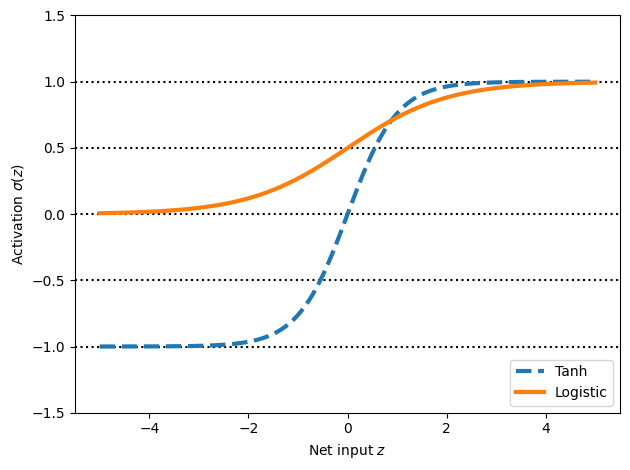

In [57]:
import matplotlib.pyplot as plt
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\sigma(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

#plt.savefig('figures/12_10.pdf')
plt.show()

In [58]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

렐루 활성화 함수

In [59]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)

In [60]:
from IPython.display import Image

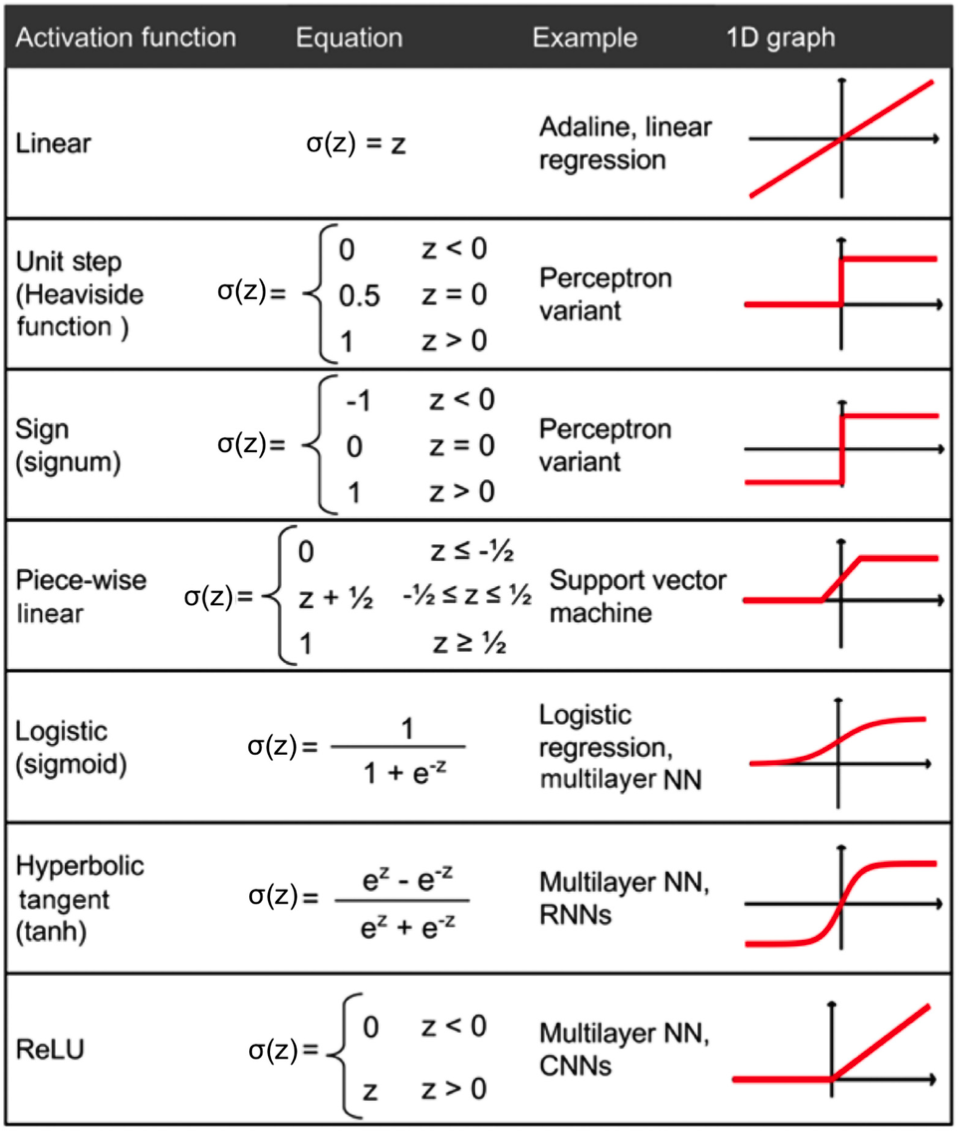

In [61]:
Image("https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_11.png")